# 데이터의 시각화
1. 라인, 바, 산점도, 히스토그램 그래프 시각화

In [1]:
import matplotlib.pyplot as plt

In [ ]:
# 라인 그래프
# plt.plot([]) -> 리스트의 값이 하나만 존재하면 y축의 값으로 지정
# plt.plot([], []) -> 앞의 리스트의 값은 x축, 뒤의 리스트의 값은 y축이 된다.
plt.plot([1,2,3,4])
plt.show()

## subplot()
1. 한 영역에 그래프를 여러개 그려주기 위한 함수
2. subplot(행의 개수, 열의 개수, 위치)

In [ ]:
plt.subplot(1,2,1)
plt.plot([1,2,3,4])
plt.subplot(1,2,2)
plt.plot([4,3,2,1])
plt.show()

In [ ]:
fig, axes = plt.subplots(2,2)
axes[0][0].plot([1,2,3,4])
axes[0][1].plot([4,3,2,1])
axes[1][0].plot([1,2,2,1])
axes[1][1].plot([3,4,2,1])
plt.show()

In [ ]:
x = [1,2,3,4]
y = [4,3,2,1]
plt.plot(x,y)
plt.show()

In [ ]:
# x축의 이름과 y축의 이름, 그래프의 이름 지정
plt.plot([1,2,3,4])
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('title')
plt.show()

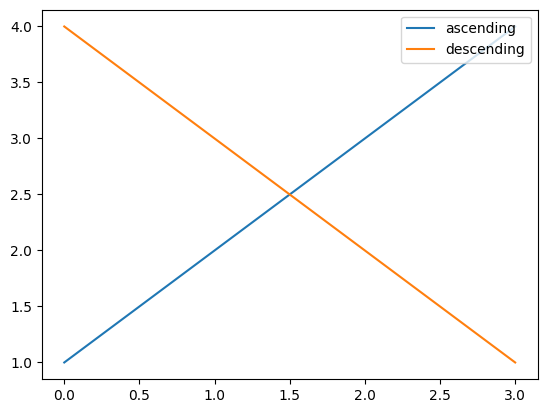

In [7]:
# 범례 추가
plt.plot([1,2,3,4], label = 'ascending')
plt.plot([4,3,2,1], label = 'descending') 
plt.legend(loc = 'upper right')
plt.show()

In [ ]:
# 히스토그램 -> 데이터의 개수를 표현하는 바 그래프
data = [1,2,2,2,3,3,4,4,4,4]
plt.hist(data, bins=10) # bins 안 넣으면 디폴트로 bins = 10을 넣어준다
plt.show()

In [12]:
# finance-datareader 라이브러리 설치
!pip install finance-datareader

  Using cached finance_datareader-0.9.50-py3-none-any.whl (19 kB)
     ---------------------------------------- 77.1/77.1 kB 4.5 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import FinanceDataReader as fdr

In [14]:
kospi = fdr.DataReader('ks11', '2019')

In [ ]:
kospi

In [17]:
import platform

if platform.system() == 'Darwin':
    plt.rc('font', family='AplleGothic')
else:
    plt.rc('font', family='Malgun Gothic')

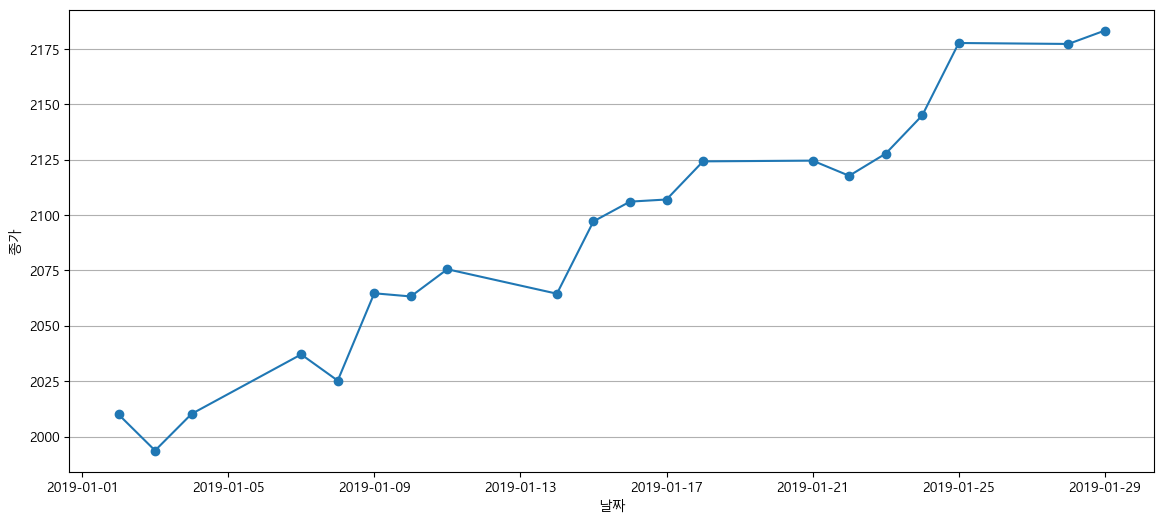

In [22]:
# 그래프 사이즈를 조절
plt.figure(figsize=(14,6))
# grid 추가
plt.grid(True, axis='y')
plt.plot(kospi['Close'].head(20), marker = 'o')
plt.xlabel('날짜')
plt.ylabel('종가')
plt.show()


In [23]:
mean_kospi_2020 = kospi.loc['2020'].resample('MS').mean()
mean_kospi_2020

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,2207.549011,2218.407983,2192.596985,2203.442480,2203.442480,6.547750e+05
2020-02-01,2166.166009,2183.180481,2150.528473,2167.123486,2167.123486,6.979300e+05
2020-03-01,1794.281372,1824.905923,1751.699097,1786.746360,1786.746360,7.768545e+05
2020-04-01,1844.271509,1864.863995,1825.824017,1849.588989,1849.588989,1.052250e+06
2020-05-01,1963.487883,1975.821578,1949.949990,1965.174214,1965.174214,8.529158e+05
2020-06-01,2134.890436,2154.157715,2112.594993,2134.696827,2134.696827,9.028227e+05
2020-07-01,2197.626518,2209.355692,2184.291759,2195.948677,2195.948677,8.202739e+05
2020-08-01,2354.817493,2370.443506,2330.037500,2349.873010,2349.873010,8.815750e+05
2020-09-01,2375.035714,2385.536691,2355.750942,2371.516171,2371.516171,9.336571e+05


In [ ]:
# x축은 'xxxx년xx월' 표시
#mean_kospi_2020.index[0].strftime('%Y년%m월')

x = []
for i in mean_kospi_2020.index:
    x.append(i.strftime('%Y년%m월'))

x

In [ ]:
x = list(map( lambda x : x.strftime('%Y년%m월'), mean_kospi_2020.index ))
x

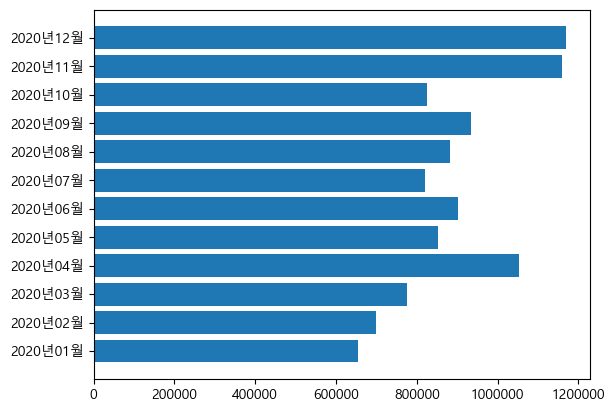

In [37]:
plt.barh(x, mean_kospi_2020['Volume'])
plt.ticklabel_format(axis='x', style='plain')
plt.show()

In [38]:
# kospi에서 변동률 파생변수
# 변동률 = (종가-시가) / 시가 * 100
kospi['변동률'] = (kospi['Close'] - kospi['Open'])/kospi['Open'] * 100
kospi.head()

,Open,High,Low,Close,Adj Close,Volume,변동률
Date,,,,,,,
2019-01-02,2050.550049,2053.449951,2004.270020,2010.000000,2010.000000,326400,-1.977521
2019-01-03,2011.810059,2014.719971,1991.650024,1993.699951,1993.699951,428000,-0.900190
2019-01-04,1992.400024,2011.560059,1984.530029,2010.250000,2010.250000,409000,0.895903
2019-01-07,2034.239990,2048.060059,2030.900024,2037.099976,2037.099976,440200,0.140592
2019-01-08,2038.680054,2042.699951,2023.589966,2025.270020,2025.270020,397800,-0.657780


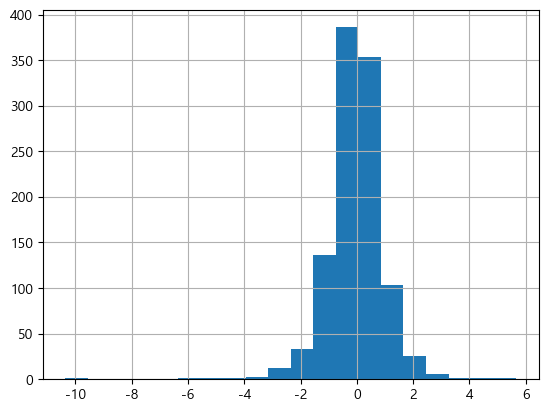

In [40]:
# 음수를 표시
plt.rc('axes', unicode_minus = False)
plt.grid()
plt.hist(kospi['변동률'], bins=20)
plt.show()

### candle stick

In [42]:
!pip install mplfinance

     ---------------------------------------- 73.1/73.1 kB 3.9 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
import mplfinance as mpf

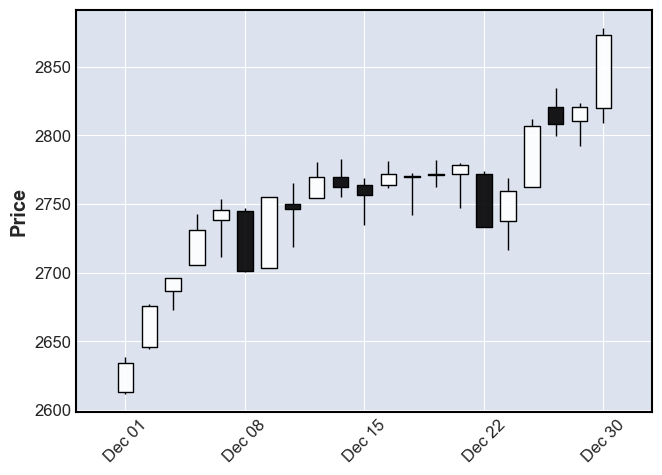

In [47]:
mpf.plot(data = kospi.loc['2020-12'], type = 'candle')

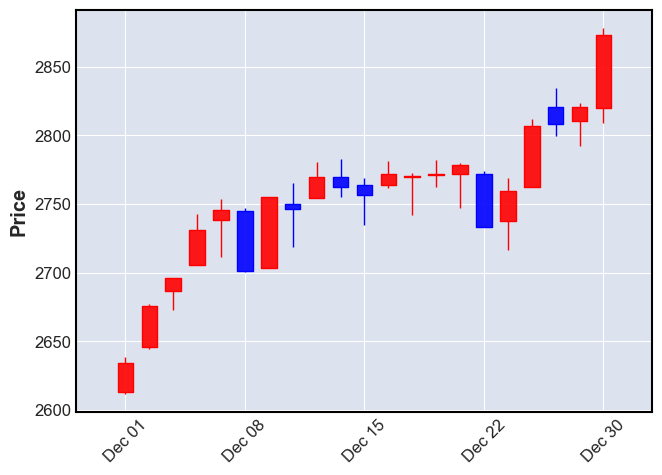

In [57]:
marketcolor = mpf.make_marketcolors(
    up = 'r',
    down = 'b',
    edge = 'inherit',   # 기존의 값을 그대로 계승해서 쓰겠다
    wick = 'inherit'

)

style = mpf.make_mpf_style(
    base_mpf_style = 'default',
    marketcolors = marketcolor,
    gridaxis = 'both',
    y_on_right = False

)
mpf.plot(data = kospi.loc['2020-12'], type='candle', style = style)

# 문제
1. test_csv 폴더 안에 있는 오프라인.csv을 로드
2. 컬럼의 이름을 ['기준년월', '업종', '성별', '연령대', '총이용건수', '총이용금액']으로 변경
3. 기준년월을 시계열 데이터로 변경
4. index를 기준년월로 변경
5. 온라인.csv 파일도 위의 작업을 반복한다.
6. 온라인에 업종 컬럼을 추가하여 '온라인'으로 값을 지정
7. 두개의 데이터프레임을 유니언 결합
8. 기준년월, 업종 별 총 이용금액의 합계를 라인그래프로 시각화

In [69]:
import pandas as pd
from datetime import datetime

In [79]:
# 1~4 오프라인
df_off = pd.read_csv("../test_csv/오프라인.csv", encoding='euc-kr')
df_off.columns = ['기준년월', '업종', '성별', '연령대', '총이용건수', '총이용금액']
df_off['기준년월'] = pd.to_datetime(df_off['기준년월'], format='%Y%m')
df_off = df_off.set_index('기준년월')

In [86]:
# 1~4 온라인
df_on = pd.read_csv("../test_csv/온라인.csv", encoding='euc-kr')
df_on.columns = ['기준년월', '성별', '연령대', '총이용건수', '총이용금액']
df_on['기준년월'] = pd.to_datetime(df_on['기준년월'], format='%Y%m')
df_on = df_on.set_index('기준년월')

In [89]:
# 6
df_on['업종'] = '온라인'

In [97]:
# 7
data = pd.concat([df_off, df_on], axis=0)

In [94]:
df_off

,업종,성별,연령대,총이용건수,총이용금액
기준년월,,,,,
2019-01-01,백화점,1,1,1,7.600000e+03
2019-01-01,백화점,1,10,379,1.945872e+07
2019-01-01,백화점,1,20,45173,4.747711e+09
2019-01-01,백화점,1,30,271858,2.791826e+10
2019-01-01,백화점,1,40,391109,3.791149e+10
...,...,...,...,...,...
2021-09-01,편의점,2,50,844081,6.283353e+09
2021-09-01,편의점,2,60,243768,1.997442e+09
2021-09-01,편의점,2,70,40523,3.524203e+08


In [95]:
df_on

,성별,연령대,총이용건수,총이용금액,업종
기준년월,,,,,
2019-01-01,1,1,1,110685,온라인
2019-01-01,1,10,2333,98108225,온라인
2019-01-01,1,20,272915,13854081656,온라인
2019-01-01,1,30,1320227,82946127640,온라인
2019-01-01,1,40,1372052,95550848337,온라인
...,...,...,...,...,...
2021-09-01,2,50,3237324,181360535814,온라인
2021-09-01,2,60,1019719,70026626874,온라인
2021-09-01,2,70,159261,13091029631,온라인


In [101]:
data

,업종,성별,연령대,총이용건수,총이용금액
기준년월,,,,,
2019-01-01,백화점,1,1,1,7.600000e+03
2019-01-01,편의점,2,20,368222,2.257455e+09
2019-01-01,편의점,2,10,4768,2.541773e+07
2019-01-01,편의점,2,1,6,1.722000e+04
2019-01-01,편의점,2,0,5,3.168000e+04
...,...,...,...,...,...
2021-09-01,온라인,2,80,20094,1.935122e+09
2021-09-01,할인점,2,30,316851,1.346662e+10
2021-09-01,할인점,2,20,63815,2.686163e+09


In [100]:
# 인덱스를 기준으로 오름차순 정렬
data.sort_index(inplace=True)

In [103]:
pivot_data = pd.pivot_table(
    data,
    index = data.index,
    columns = '업종',
    values = '총이용금액', 
    aggfunc = 'sum'
)

In [102]:
import platform

if platform.system() == 'Darwin':
    plt.rc('font', family='AplleGothic')
else:
    plt.rc('font', family='Malgun Gothic')

<Axes: xlabel='기준년월'>

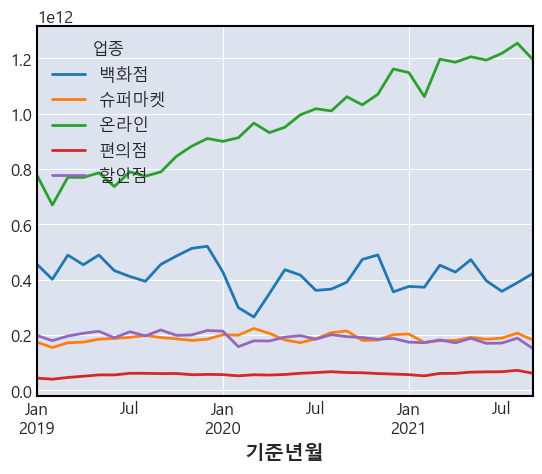

In [104]:
pivot_data.plot()

In [106]:
group_data = data.groupby([data.index, '업종']).sum()['총이용금액']

<Axes: xlabel='기준년월'>

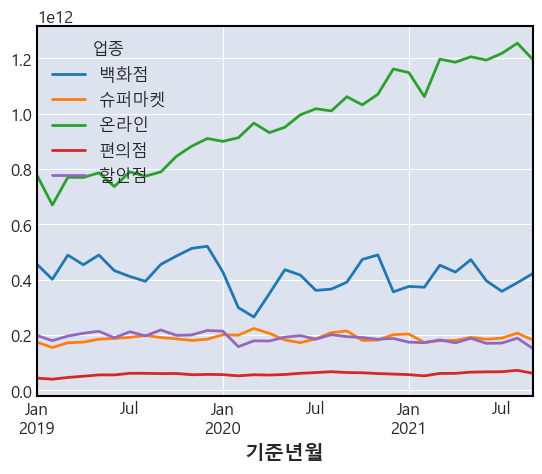

In [109]:
group_data.unstack().plot()